## Generated functions

See macros

- http://www.abisen.com/blog/metaprogramming/


- https://discourse.julialang.org/t/understanding-generated-functions/10092/2


- https://medium.com/@acidflask/smoothing-data-with-julia-s-generated-functions-c80e240e05f3

- https://discourse.julialang.org/t/understanding-generated-functions/10092/2






## Exercise: Improving Histogram of oriented gradients example:

In order to build a histogram of oriented gradients we will use a function takes as input two arrays  `magnitudes` and `orientations` of the same size. Let us define `n_vec = length(magnitudes)`. Then those two arrays codify a set of `n_vec` vectors in polar form.

Independently of `n_vec` we want to create a histogram of `n_bins` that aggregates the information of the `n_vec` vectors.  This histogram will be called  `magnitudes_to_bins`  and will have length `n_bins`.

In [1]:
using PyPlot
using TestImages
using ImageFeatures
using Images
using TestImages
using BenchmarkTools
using StaticArrays

In [2]:
p =  testimage("lena_gray")
size(p)

(256, 256)

In [3]:
@time begin
    gx          = imfilter(p, centered([-1 0 1]))
    gy          = imfilter(p, centered([-1 0 1]'));
    magnitudes  = hypot.(gx, gy);
    angles      = abs.(orientation.(gy, gx));
end;

  5.812180 seconds (17.49 M allocations: 841.577 MiB, 8.35% gc time)


In [4]:
kernel_x = centered([-1 0 1])
kernel_y = centered([-1 0 1]')

@benchmark begin
    gx          = imfilter(p, kernel_x)
    gy          = imfilter(p, kernel_y);
    magnitudes  = hypot.(gx, gy);
    angles      = abs.(orientation.(gy, gx));
end

BenchmarkTools.Trial: 
  memory estimate:  12.14 MiB
  allocs estimate:  968
  --------------
  minimum time:     4.198 ms (0.00% GC)
  median time:      6.062 ms (0.00% GC)
  mean time:        9.038 ms (4.89% GC)
  maximum time:     249.388 ms (97.91% GC)
  --------------
  samples:          553
  evals/sample:     1

In [5]:
kernel_x = (ImageFiltering.ReshapedOneD{2,1}(centered([-1,0,1])),)
kernel_y = (ImageFiltering.ReshapedOneD{2,1}(centered([-1,0,1])),)

@benchmark begin
    gx          = imfilter(p, kernel_x)
    gy          = imfilter(p, kernel_y);
    magnitudes  = hypot.(gx, gy);
    angles      = abs.(orientation.(gy, gx));
end

BenchmarkTools.Trial: 
  memory estimate:  1.51 MiB
  allocs estimate:  56
  --------------
  minimum time:     2.027 ms (0.00% GC)
  median time:      2.674 ms (0.00% GC)
  mean time:        2.707 ms (0.00% GC)
  maximum time:     5.002 ms (0.00% GC)
  --------------
  samples:          1844
  evals/sample:     1

#### Inplace imfilter function

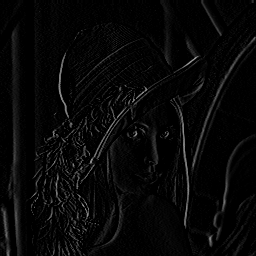

In [6]:
#kernel_y = (centered([-1,0,1])',)
kernel_x = centered([-1 0 1])
#kernel_y = centered([-1,0,1])
gy           = imfilter(p, kernel_x)
#gy2          = imfilter(p, kernel_y2)

In [7]:
kernel_x = centered([-1 0 1])
@benchmark imfilter(p, kernel_x)

BenchmarkTools.Trial: 
  memory estimate:  10.85 MiB
  allocs estimate:  66
  --------------
  minimum time:     991.543 μs (0.00% GC)
  median time:      1.590 ms (0.00% GC)
  mean time:        2.376 ms (26.09% GC)
  maximum time:     206.710 ms (99.24% GC)
  --------------
  samples:          2097
  evals/sample:     1

In [8]:
kernel_x = (ImageFiltering.ReshapedOneD{2,1}(centered([-1,0,1])),)
@benchmark imfilter(p, kernel_x)

BenchmarkTools.Trial: 
  memory estimate:  519.23 KiB
  allocs estimate:  23
  --------------
  minimum time:     240.319 μs (0.00% GC)
  median time:      478.026 μs (0.00% GC)
  mean time:        601.059 μs (0.00% GC)
  maximum time:     31.638 ms (0.00% GC)
  --------------
  samples:          8254
  evals/sample:     1

#### kernel

In [9]:
kernel_x1 = centered([-1 0 1])
kernel_x2 = (ImageFiltering.ReshapedOneD{2,1}(centered([-1,0,1])),)
isapprox(imfilter(p,kernel_x1), imfilter(p, kernel_x2))

true

In [10]:
kernel_y1 = centered([-1 0 1]')
kernel_y2 = (centered([-1 0 1]),) # this is simply the kernel_x1 result
isapprox(imfilter(p,kernel_y1), imfilter(p, kernel_y2))

false

In [11]:
isapprox(imfilter(p,kernel_x1), imfilter(p, kernel_y1))

false

In [12]:
isapprox(imfilter(p,kernel_x1), imfilter(p, kernel_y2))

true

In [13]:
isapprox(imfilter(p,kernel_x2), imfilter(p, kernel_y1))

false

In [14]:
isapprox(imfilter(p,kernel_x2), imfilter(p, kernel_y2))

true

In [15]:
@benchmark imfilter(p, kernel_x1)

BenchmarkTools.Trial: 
  memory estimate:  10.85 MiB
  allocs estimate:  66
  --------------
  minimum time:     983.773 μs (0.00% GC)
  median time:      1.555 ms (0.00% GC)
  mean time:        2.307 ms (26.38% GC)
  maximum time:     221.838 ms (99.30% GC)
  --------------
  samples:          2160
  evals/sample:     1

In [16]:
@benchmark imfilter(p, kernel_x2)

BenchmarkTools.Trial: 
  memory estimate:  519.23 KiB
  allocs estimate:  23
  --------------
  minimum time:     244.265 μs (0.00% GC)
  median time:      476.587 μs (0.00% GC)
  mean time:        591.621 μs (0.00% GC)
  maximum time:     21.656 ms (0.00% GC)
  --------------
  samples:          8386
  evals/sample:     1

In [17]:
placeholder = zeros(size(p));

In [18]:
?centered

search: centered center_sample center component_centroids



```
centered(kernel) -> shiftedkernel
```

Shift the origin-of-coordinates to the center of `kernel`. The center-element of `kernel` will be accessed by `shiftedkernel[0, 0, ...]`.

This function makes it easy to supply kernels using regular Arrays, and provides compatibility with other languages that do not support arbitrary axes.

See also: [`imfilter`](@ref).


In [19]:
centered([-1 0 1])

OffsetArray(::Array{Int64,2}, 0:0, -1:1) with eltype Int64 with indices 0:0×-1:1:
 -1  0  1

In [20]:
centered([-1 0 1])'

LinearAlgebra.Adjoint{Int64,OffsetArrays.OffsetArray{Int64,2,Array{Int64,2}}} with indices -1:1×0:0:
 -1
  0
  1

In [21]:
# column vector (1d array)
[-1, 0, 1]

3-element Array{Int64,1}:
 -1
  0
  1

In [22]:
# row vector (2d array)
[-1 0 1]

1×3 Array{Int64,2}:
 -1  0  1

  0.568211 seconds (1.03 M allocations: 62.268 MiB)


┌ Warning: assuming that the origin is at the center of the kernel; to avoid this warning, call `centered(kernel)` or use an OffsetArray
│   caller = kernelshift at imfilter.jl:1509 [inlined]
└ @ Core /Users/david.buchaca/.julia/packages/ImageFiltering/bMda8/src/imfilter.jl:1509
┌ Warning: assuming that the origin is at the center of the kernel; to avoid this warning, call `centered(kernel)` or use an OffsetArray
│   caller = kernelshift at imfilter.jl:1509 [inlined]
└ @ Core /Users/david.buchaca/.julia/packages/ImageFiltering/bMda8/src/imfilter.jl:1509


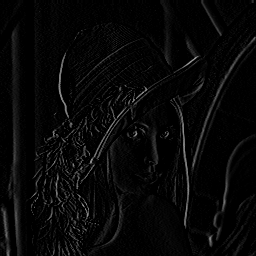

In [23]:
@time imfilter(p, [-1 0 1])

  0.004771 seconds (1.08 k allocations: 829.938 KiB)


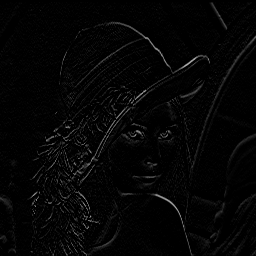

In [24]:
@time imfilter(p, kernel_y1)

In [25]:
@benchmark imfilter!($placeholder, $p, $kernel_x2)

BenchmarkTools.Trial: 
  memory estimate:  521.16 KiB
  allocs estimate:  21
  --------------
  minimum time:     200.399 μs (0.00% GC)
  median time:      434.370 μs (0.00% GC)
  mean time:        490.430 μs (8.41% GC)
  maximum time:     413.122 ms (99.88% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [26]:
@benchmark imfilter($p, $kernel_y1)

BenchmarkTools.Trial: 
  memory estimate:  820.98 KiB
  allocs estimate:  949
  --------------
  minimum time:     334.435 μs (0.00% GC)
  median time:      598.281 μs (0.00% GC)
  mean time:        2.230 ms (0.00% GC)
  maximum time:     28.411 ms (0.00% GC)
  --------------
  samples:          2237
  evals/sample:     1

In [27]:
@benchmark imfilter($p, $kernel_y2)

BenchmarkTools.Trial: 
  memory estimate:  519.23 KiB
  allocs estimate:  23
  --------------
  minimum time:     419.932 μs (0.00% GC)
  median time:      661.450 μs (0.00% GC)
  mean time:        670.474 μs (0.00% GC)
  maximum time:     1.507 ms (0.00% GC)
  --------------
  samples:          7427
  evals/sample:     1

In [28]:
function to_gray(image)
    x = Array{ColorTypes.Gray{Float32}, 2}(image)
    return Array{Float32}(x)
end

to_gray (generic function with 1 method)

The boundaries of  the histogram in 180 degrees are

In [29]:
n_bins    = 8
bin_width = pi/n_bins 
boundaries = []
for i in 1:n_bins
    push!(boundaries,bin_width*i)
end
boundaries

8-element Array{Any,1}:
 0.39269908169872414
 0.7853981633974483 
 1.1780972450961724 
 1.5707963267948966 
 1.9634954084936207 
 2.356194490192345  
 2.748893571891069  
 3.141592653589793  

## Building histogram of gradient magnitudes

In [30]:
function gradients_to_bins!(hist, magnitudes, orientations)
    n_bins = length(hist)
    T = eltype(magnitudes)
    bin_width = T(pi/n_bins)
    
    @inbounds for (orientation, magnitude) in zip(orientations, magnitudes)
        local upper_bin_limit = bin_width
        for i in 1:n_bins
            if  orientation <= upper_bin_limit
                hist[i] += magnitude
                break
            end
            upper_bin_limit += bin_width
        end
    end
    
end

gradients_to_bins! (generic function with 1 method)

In [31]:
n_bins = 9
hist = zeros(n_bins)
p =  testimage("lena_gray")
gx          = imfilter(p, centered([-1 0 1]))
gy          = imfilter(p, centered([-1 0 1]'));
magnitudes  = hypot.(gx, gy);
angles      = abs.(orientation.(gy, gx));

In [32]:
@time gradients_to_bins!(hist, magnitudes, angles)

  0.041059 seconds (88.64 k allocations: 4.431 MiB)


In [33]:
@btime gradients_to_bins!(hist, magnitudes, angles)

  642.957 μs (0 allocations: 0 bytes)


In [34]:
@benchmark gradients_to_bins!(hist, magnitudes, angles)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     643.170 μs (0.00% GC)
  median time:      649.088 μs (0.00% GC)
  mean time:        662.131 μs (0.00% GC)
  maximum time:     1.407 ms (0.00% GC)
  --------------
  samples:          7529
  evals/sample:     1

We are computing `upper_bin_limit += bin_width` at runtime 

#### Evaluating in a small grid

This function will be applied lots of times in small regions. Therefore the previous benchmarks are not very representative.

For julia 1.0 we get better results with the first approach!

In [35]:
magnitudes_small = magnitudes[1:16,1:16]
angles_small     = angles[1:16,1:16]
hist             = zeros(n_bins)

@btime gradients_to_bins!($hist, $magnitudes_small, $angles_small)

  786.253 ns (0 allocations: 0 bytes)


#### Building histograms for small patches within the image

In [36]:
typeof(boundaries)

Array{Any,1}

In [37]:
boundaries

8-element Array{Any,1}:
 0.39269908169872414
 0.7853981633974483 
 1.1780972450961724 
 1.5707963267948966 
 1.9634954084936207 
 2.356194490192345  
 2.748893571891069  
 3.141592653589793  

## Converting a gradient orientation to its correspondant index on the histogram 

In [38]:
bin_width

0.39269908169872414

In [39]:
epsilon = 0.000001
bin_width = (pi+epsilon)/n_bins

0.34906596150997704

In [105]:
select_bin(x::T, bin_width::T) where T<:Number = trunc(Int, 1 + x/bin_width) 

select_bin (generic function with 2 methods)

In [106]:
@benchmark  select_bin(0.1, bin_width)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     6.815 ns (0.00% GC)
  median time:      6.848 ns (0.00% GC)
  mean time:        6.914 ns (0.00% GC)
  maximum time:     22.142 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

In [107]:
boundaries

8-element Array{Any,1}:
 0.39269908169872414
 0.7853981633974483 
 1.1780972450961724 
 1.5707963267948966 
 1.9634954084936207 
 2.356194490192345  
 2.748893571891069  
 3.141592653589793  

In [108]:
select_bin(0.1, bin_width)

1

In [109]:
select_bin(0.4, bin_width)

2

In [110]:
select_bin(0.7, bin_width)

3

In [111]:
select_bin(1.2, bin_width)

4

In [113]:
select_bin(3.1, bin_width)

9

In [161]:
function gradients_to_bins_direct!(hist,
                                   magnitudes, 
                                   orientations)
    n_bins = length(hist)
    bin_width = Float32((pi+ 0.000001)/n_bins)
    #bin_width = Float32(0.3490659)

    for (orientation, magnitude) in zip(orientations, magnitudes)        
        hist[select_bin(orientation, bin_width)] += magnitude
    end
        
end

gradients_to_bins_direct! (generic function with 1 method)

In [163]:
magnitudes_small = magnitudes[1:16,1:16]
angles_small     = angles[1:16,1:16]
hist             = zeros(Float32,n_bins);
gradients_to_bins_direct!(hist, magnitudes_small, angles_small)

In [164]:
magnitudes_small  = magnitudes[1:16,1:16]
angles_small      = angles[1:16,1:16]
hist2             = zeros(Float32,n_bins)
gradients_to_bins!(hist2, magnitudes_small, angles_small)

In [165]:
hist - hist2

9-element Array{Float32,1}:
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.35686275

#### Benchmarking 

In [166]:
magnitudes_small  = magnitudes[1:16,1:16]
angles_small      = angles[1:16,1:16]
hist2             = zeros(Float32,n_bins)
@benchmark gradients_to_bins!($hist2, $magnitudes_small, $angles_small)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     815.659 ns (0.00% GC)
  median time:      837.300 ns (0.00% GC)
  mean time:        859.717 ns (0.00% GC)
  maximum time:     1.943 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     85

In [ ]:
magnitudes_small  = magnitudes[1:16,1:16]
angles_small      = angles[1:16,1:16]
hist2             = zeros(Float32,n_bins)
@benchmark gradients_to_bins_direct!($hist2, $magnitudes_small, $angles_small)

#### Possible improvement

Notice that the computation of the bin width could be done ouside the function

In [ ]:
@benchmark  (pi/n_bins) + 0.0000000001

In [ ]:
(pi/n_bins) + 0.0000000001